# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

> ##### Data Problem Definition
>
> We have been asked to identify the relevant features that help predict the price for used cars. This is framed as a regression problem with `price` as the target feature. We will need to explore, engineer, and select the explanatory features for final use in the model and explain the impacts they have on the target feature

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

> ##### Steps to getting to know the data
>
> - Examine column names, types, and the data dictionary if available
> - Examine the dataset for missing values
> - Look at basic descriptive statistics for all columns
> - Examine the plots/distributions of features
> - Look at the correlations    

In [5]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Import supplementary functions
from pyskim import skim

In [11]:
# Read in the data
raw_vehicles = pd.read_csv('data/vehicles.csv')

# Display features and data types
display(raw_vehicles.dtypes)
display(raw_vehicles.shape)

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

(426880, 18)

In [12]:
# Generate table of % missing values by column
missing_vals = raw_vehicles.isna().sum()/raw_vehicles.shape[0]
display(type(missing_vals))

pandas.core.series.Series

In [13]:
# Look at the descriptive statistics for all of the columns
skim(raw_vehicles)

── Data Summary ────────────────────────────────────────────────────────────────────────────────────
type                 value
-----------------  -------
Number of rows      426880
Number of columns       18
──────────────────────────────────────────────────
Column type frequency:
           Count
-------  -------
object        14
int64          2
float64        2

── Variable type: number ───────────────────────────────────────────────────────────────────────────
    name        na_count      mean        sd        p0       p25       p50       p75      p100  hist
--  --------  ----------  --------  --------  --------  --------  --------  --------  --------  ----------
 0  id                 0  7.31e+09  4.47e+06  7.21e+09  7.31e+09  7.31e+09  7.32e+09  7.32e+09  ▁▁▁▁▁▁▁▁▂▇
 1  price              0  7.52e+04  1.22e+07  0         5.9e+03   1.4e+04   2.65e+04  3.74e+09  ▇▁▁▁▁▁▁▁▁▁
 2  year            1205  2.01e+03  9.45      1.9e+03   2.01e+03  2.01e+03  2.02e+03  2.02e+03  ▁▁▁▁▁▁▁▁▃▇
 

<Axes: ylabel='price'>

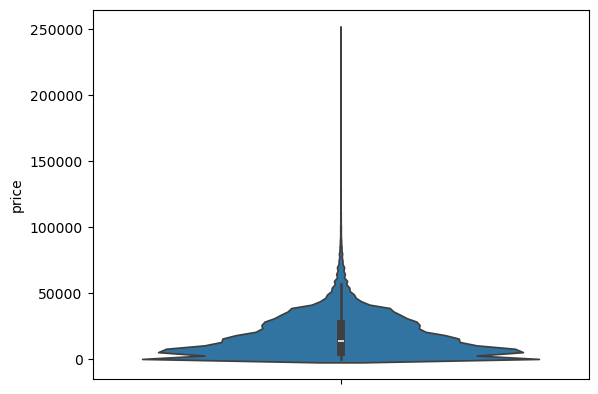

In [ ]:
sns.violinplot(raw_vehicles['price'][raw_vehicles['price'] < 250_000)

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [26]:
# Handle missing values

# Eliminate columns with more than 10% missing values
na_obs_threshold = round(raw_vehicles.shape[0]*.9,0)
vehicles = raw_vehicles.dropna(thresh=na_obs_threshold, axis=1)
print(f'Dropped columns with more than {na_obs_threshold}\n')

# Eliminate observation that are missing
vehicles = vehicles.dropna(axis=0)

# Verify missing values
skim(vehicles)



Dropped columns with more than 384192.0

── Data Summary ────────────────────────────────────────────────────────────────────────────────────
type                 value
-----------------  -------
Number of rows      389604
Number of columns       11
──────────────────────────────────────────────────
Column type frequency:
           Count
-------  -------
object         7
int64          2
float64        2

── Variable type: number ───────────────────────────────────────────────────────────────────────────
    name        na_count      mean        sd       p0       p25       p50       p75      p100  hist
--  --------  ----------  --------  --------  -------  --------  --------  --------  --------  ----------
 0  id                 0  7.31e+09  4.38e+06  7.3e+09  7.31e+09  7.31e+09  7.32e+09  7.32e+09  ▁▁▁▁▁▂▃▄▆▇
 1  price              0  6.4e+04   1.14e+07  0        6e+03     1.4e+04   2.66e+04  3.74e+09  ▇▁▁▁▁▁▁▁▁▁
 2  year               0  2.01e+03  8.64      1.9e+03  2.01e+03  2.01e+

In [ ]:
# Exclude extreme outliers

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.